In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plot

In [2]:
#memanggil dataset
movies = pd.read_csv('C:/Users/ROJASQI FADILLA/Bismillah/title_movies.csv')
ratings = pd.read_csv('C:/Users/ROJASQI FADILLA/Bismillah/ratings_movies.csv')

In [3]:
#melihat brp bnyak dataset yg sya pnya
print('dataset berisi: ', len(ratings), ' rating dari ', len(movies), ' movies.')

dataset berisi:  105339  rating dari  10329  movies.


In [4]:
#menggabungkan dataset
dataset = pd.merge(ratings, movies)
dataset

userId  movieId  rating   timestamp                        title  \
0            1       16     4.0  1217897793                Casino (1995)   
1            9       16     4.0   842686699                Casino (1995)   
2           12       16     1.5  1144396284                Casino (1995)   
3           24       16     4.0   963468757                Casino (1995)   
4           29       16     3.0   836820223                Casino (1995)   
...        ...      ...     ...         ...                          ...   
105334     668   140098     2.5  1450415424                Runoff (2015)   
105335     668   140816     2.5  1443288791             Tangerine (2015)   
105336     668   141472     2.5  1442679119  The 50 Year Argument (2014)   
105337     668   142488     4.0  1451535844             Spotlight (2015)   
105338     668   142507     3.5  1451535889        Pawn Sacrifice (2015)   

                    genres  
0              Crime|Drama  
1              Crime|Drama  
2              Crime|Drama  
3              Crime|Drama  
4              Crime|Drama  
...                    ...  
105334               Drama  
105335        Comedy|Drama  
105336  (no genres listed)  
105337            Thriller  
105338               Drama  

[105339 rows x 6 columns]

In [5]:
#analisa dataset
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
userId       105339 non-null int64
movieId      105339 non-null int64
rating       105339 non-null float64
timestamp    105339 non-null int64
title        105339 non-null object
genres       105339 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [6]:
#mgnhitung jumlah maximal dri userId dn movieId yg ada pada dataset
dataset['userId'].max()
#dataset['movieId'].max()

668

In [7]:
#membagi genre mnjadi satusatu untk mlihat genre yg diminati user
pd.DataFrame(dataset["genres"].str.get_dummies(sep="|")).head()

(no genres listed)  Action  Adventure  Animation  Children  Comedy  Crime  \
0                   0       0          0          0         0       0      1   
1                   0       0          0          0         0       0      1   
2                   0       0          0          0         0       0      1   
3                   0       0          0          0         0       0      1   
4                   0       0          0          0         0       0      1   

   Documentary  Drama  Fantasy  Film-Noir  Horror  IMAX  Musical  Mystery  \
0            0      1        0          0       0     0        0        0   
1            0      1        0          0       0     0        0        0   
2            0      1        0          0       0     0        0        0   
3            0      1        0          0       0     0        0        0   
4            0      1        0          0       0     0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0       0         0    0        0  
1        0       0         0    0        0  
2        0       0         0    0        0  
3        0       0         0    0        0  
4        0       0         0    0        0

In [9]:
#menguhitung categori genre pling tinggi di dataset
#melihat genre pling disukai/bnyak dirating user
genre = pd.concat([dataset["genres"].str.get_dummies(sep="|"),dataset[["rating"]]],axis=1)
genre.head()

(no genres listed)  Action  Adventure  Animation  Children  Comedy  Crime  \
0                   0       0          0          0         0       0      1   
1                   0       0          0          0         0       0      1   
2                   0       0          0          0         0       0      1   
3                   0       0          0          0         0       0      1   
4                   0       0          0          0         0       0      1   

   Documentary  Drama  Fantasy  ...  Horror  IMAX  Musical  Mystery  Romance  \
0            0      1        0  ...       0     0        0        0        0   
1            0      1        0  ...       0     0        0        0        0   
2            0      1        0  ...       0     0        0        0        0   
3            0      1        0  ...       0     0        0        0        0   
4            0      1        0  ...       0     0        0        0        0   

   Sci-Fi  Thriller  War  Western  rating  
0       0         0    0        0     4.0  
1       0         0    0        0     4.0  
2       0         0    0        0     1.5  
3       0         0    0        0     4.0  
4       0         0    0        0     3.0  

[5 rows x 21 columns]

In [10]:
#melihat kolom yg sudah di pisahpisahkan
genre.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'rating'],
      dtype='object')

In [11]:
#menghitung jumlah masing-masing genre
genre.iloc[:,:-1].sum()

(no genres listed)        7
Action                31205
Adventure             23076
Animation              5966
Children               8098
Comedy                38055
Crime                 18291
Documentary            1206
Drama                 46960
Fantasy               10889
Film-Noir              1210
Horror                 7983
IMAX                   3032
Musical                4287
Mystery                8320
Romance               19094
Sci-Fi                16795
Thriller              29288
War                    5828
Western                2314
dtype: int64

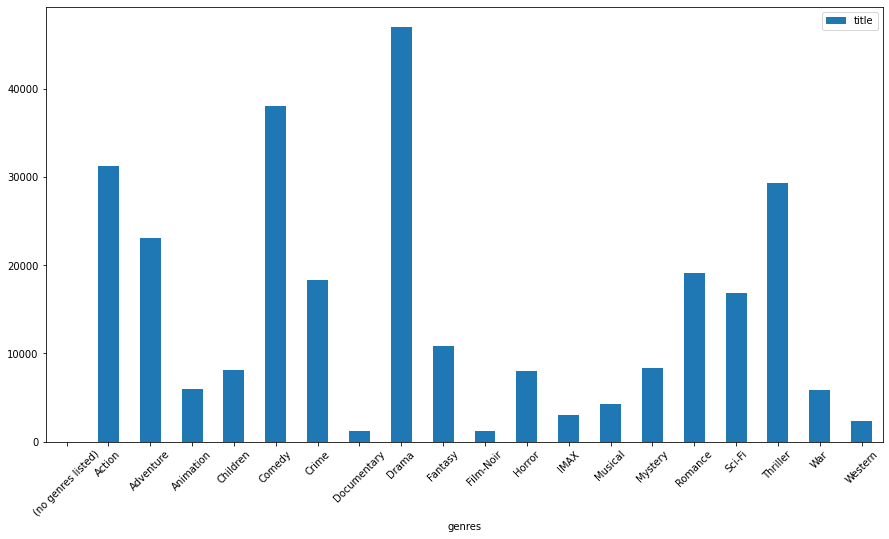

In [12]:
#visualiasi genre brdasasarkan movie/title
datagenre = pd.DataFrame({'genres':genre.iloc[:,:-1].sum().keys(),'title':genre.iloc[:,:-1].sum().values})
datagenre.plot.bar(x='genres', y='title', rot=45, figsize=(15,8))

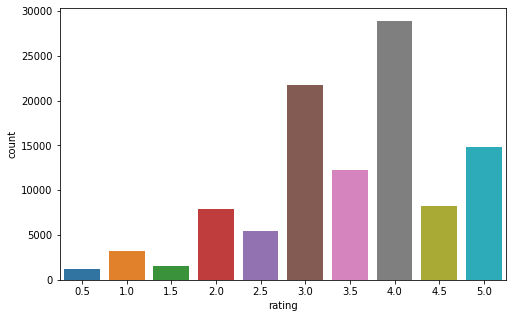

In [13]:
#melakukan perhitungan record yang ada pada kolom rating
rating = dataset['rating'].value_counts()
rating
#mengatur ukuran visualisasi
uk = (8, 5)
#visualisasi plot dengan ukuran yg telah di atur sblumnya
fig, vis = plot.subplots(figsize=uk)
#menampilkan plot dengan perhitungan record yang ada pada kolom rating yang diambil dari dataset
vis = sbn.countplot(x="rating", data=dataset)